Q1. You are working on a machine learning project where you have a dataset containing numerical and
categorical features. You have identified that some of the features are highly correlated and there are
missing values in some of the columns. You want to build a pipeline that automates the feature
engineering process and handles the missing values.

Design a pipeline that includes the following steps"

Use an automated feature selection method to identify the important features in the dataset:

Create a numerical pipeline that includes the following steps"

Impute the missing values in the numerical columns using the mean of the column values

Scale the numerical columns using standardisation

Create a categorical pipeline that includes the following steps"

Impute the missing values in the categorical columns using the most frequent value of the column

One-hot encode the categorical columns

Combine the numerical and categorical pipelines using a ColumnTransformer

Use a Random Forest Classifier to build the final model

Evaluate the accuracy of the model on the test dataset.

Note: Your solution should include code snippets for each step of the pipeline, and a brief explanation of
each step. You should also provide an interpretation of the results and suggest possible improvements for
the pipeline.

Answer:- Used Employee Attrition dataset for performing above tasks

Dataset link:- https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from warnings import filterwarnings
filterwarnings("ignore")

from sklearn.feature_selection import SelectKBest, mutual_info_classif #For feature selection
from sklearn.impute import SimpleImputer #Handling Missing Values
from sklearn.preprocessing import OneHotEncoder,StandardScaler #Handling Categorical Features & Feature Scaling
from sklearn.pipeline import Pipeline #For automating the entire process
from sklearn.compose import ColumnTransformer #Combining the numerical & Categorial columns
from sklearn.ensemble import RandomForestClassifier #Model for our output predicition

In [20]:
df = pd.read_csv("/content/diabetes_prediction_dataset.csv.zip")
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [21]:
df.shape


(100000, 9)

In [22]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [23]:
df.isnull().sum()


,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [24]:
#Now seperate dependent and independent variables
X = df.drop('diabetes', axis=1)
y = df['diabetes']

In [25]:
X.shape , y.shape


((100000, 8), (100000,))

In [26]:
cat_cols = list(X.select_dtypes(include='object').columns)
num_cols = list(X.select_dtypes(exclude='object').columns)

In [27]:
#Displaying the list of categorical columns in our dataset
cat_cols

['gender', 'smoking_history']

In [28]:
#Displaying the list of numerical columns in our dataset
num_cols

['age',
 'hypertension',
 'heart_disease',
 'bmi',
 'HbA1c_level',
 'blood_glucose_level']

In [29]:
#Imputing missing values in numerical columns & feature scaling (ie.Standardizing) the values
num_pipeline = Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy="mean")),
        ('scaler',StandardScaler())
         ]
)

#Imputing missing values in categorical columns & feature Scaling (ie.OneHotEncoding) the values
cat_pipeline = Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy="most_frequent")),
        ('scaler',OneHotEncoder())
         ]
)

In [30]:
#Combining numerical and categorical pipeline
preprocessor = ColumnTransformer([
    ('num_pipeline',num_pipeline,num_cols),
    ('cat_pipeline',cat_pipeline,cat_cols)
])

In [31]:
# Creating automated pipeline for model selection along with feature selection
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_selector', SelectKBest(score_func=mutual_info_classif, k=7)), #Selecting best 7 features
    ('classifier', RandomForestClassifier())
])

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train.shape , X_test.shape

((75000, 8), (25000, 8))

In [33]:
y_train.shape , y_test.shape


((75000,), (25000,))

In [34]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'hypertension',
                                                   'heart_disease', 'bmi',
                                                   'HbA1c_level',
                                                   'blood_glucose_level']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaler',
                                                                   OneHotEncoder())]),
                                                  ['gender',
                                                   'smoking_history'])])),
                ('feature_selector',
                 SelectKBest(k=7,
                             score_func=<function mutual_info_classif at 0x7e4fb42f28c0>)),
                ('classifier', RandomForestClassifier())])

Please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [35]:
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the accuracy of the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.96908


Q2. Build a pipeline that includes a random forest classifier and a logistic regression classifier, and then
use a voting classifier to combine their predictions. Train the pipeline on the iris dataset and evaluate its
accuracy.

Answer:-

In [36]:
from sklearn.datasets import load_iris
X,Y = load_iris(return_X_y=True)

In [37]:
X.shape


(150, 4)

In [38]:
Y.shape


(150,)

In [39]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.3,random_state=42)

In [40]:
xtrain.shape


(105, 4)

In [41]:
xtest.shape


(45, 4)

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler

# Defining Base models
rfc = RandomForestClassifier(n_estimators=100,max_depth=4)
lr = LogisticRegression(C=1.0)

# Voting Classifier Pipeline
vc = VotingClassifier(estimators=[('rfc',rfc),
                                  ('lr',lr)],
                                  voting='soft')

In [44]:
vc.fit(xtrain,ytrain)


VotingClassifier(estimators=[('rfc', RandomForestClassifier(max_depth=4)),
                             ('lr', LogisticRegression())],
                 voting='soft')

Please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [45]:
ypred_test = vc.predict(xtest)
ypred_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

<Axes: >

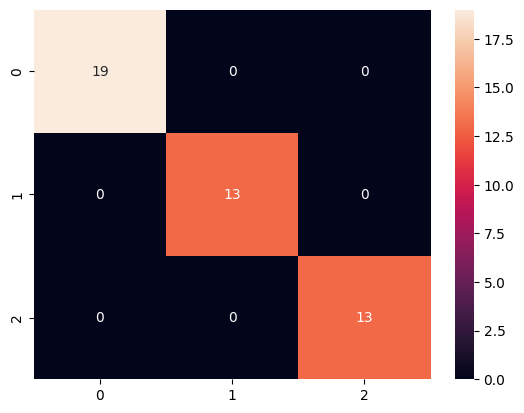

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf = confusion_matrix(ytest,ypred_test)
sns.heatmap(cf,annot=True,fmt='d')

In [47]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [48]:
# Accuracy Score
from sklearn.metrics import accuracy_score
acc = accuracy_score(ytest,ypred_test)
print(f'Accuracy on Final Voting Classifier model is {acc*100:.2f}%')

Accuracy on Final Voting Classifier model is 100.00%
